## 感知器(perception)
* 及閘(AND)
* 反及閘(NAND)
* 或閘(OR)
* 互斥或閘(XOR)

In [8]:
import numpy as np

#定義階梯函數
# x 只能輸入單一的實數，不能輸入陣列
def step_function(x):
    if x <= 0:
        return 0
    else:
        return 1

#定義及閘(AND)
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    return step_function(tmp)
    
#定義反及閘(NAND)
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    return step_function(tmp)
    
#定義或閘(OR)
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    return step_function(tmp)

#定義互斥或閘(XOR) -> 雙層感知器   
def XOR(x1, x2):
    s1 = NAND(x1 ,x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

## 活化函數(activation function)
* 階梯函數 (step function)
* sigmoid 函數
* ReLU 函數
* softmax 函數

#### step function、sigmoid function、ReLU function

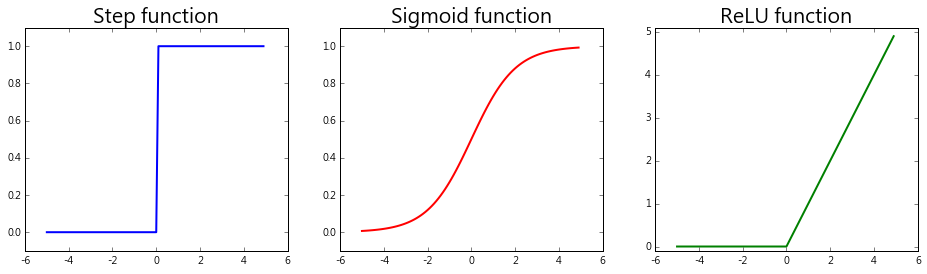

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False

#定義 階梯函數
#方法一
# x從單一的輸入實數，變成可以使用 Numpy array 運算的定義方法 
def step_function_1(x):
    #將陣列中的元素進行不等式運算，變成布林陣列 y
    y = x > 0
    #將 y 陣列中的元素布林型態轉換成 int 型態
    return y.astype(np.int)

#方法二
def step_function_2(x):
    return np.array(x > 0, dtype = np.int)

#定義 sigmoid函數
def sigmoid(x):
    #使用了 Numpy 的 broadcast 功能，當 x 是 numpy array 時,可以使用純量與 numpy array 進行運算
    return 1/(1 + np.exp(-x))

#定義 ReLU函數
def relu(x):
    return np.maximum(0, x)

#作圖
x = np.arange(-5, 5, 0.1)
y1 = step_function_2(x)
y2 = sigmoid(x)
y3 = relu(x)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes[0].plot(x, y1, color='b', lw=2)
axes[0].set_title("Step function", fontsize=20)
axes[0].set_ylim(-0.1, 1.1)
axes[1].plot(x, y2, color='r', lw=2)
axes[1].set_title("Sigmoid function", fontsize=20)
axes[1].set_ylim(-0.1, 1.1)
axes[2].plot(x, y3, color='g', lw=2)
axes[2].set_title("ReLU function", fontsize=20)
axes[2].set_ylim(-0.1, 5.1)
plt.show()

#### softmax 函數(在學習階段非常重要，推論階段一般會省略)

In [48]:
import numpy as np

#定義 softmax 函數
def softmax(a):
    # c 的目的為防範溢位
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 三層神經網路
* 多維陣列運算
* 輸出層(output layer)
  - 回歸問題 -> 恆等函數 (identity function)
  - 兩類別分類 -> sigmoid 函數
  - 多類別分類 -> softmax 函數

#### 處理神經網路的步驟:

In [46]:
import numpy as np

#定義隱藏層的活化函數
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#定義輸出層的活化函數
def identity_function(x):
    return x

#輸入層
X = np.array([1.0, 0.5])

#第一層(隱藏層)
#權重與偏權值
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

#活化函數
Z1 = sigmoid(A1)

#第二層(隱藏層)
#權重與偏權值
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2

#活化函數
Z2 = sigmoid(A2)

#輸出層
#權重與偏權值
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

#活化函數
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


#### 統整過程

In [47]:
import numpy as np

#定義隱藏層的活化函數
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#定義輸出層的活化函數
def identity_function(x):
    return x

#定義三層神經網路中的權重與偏權值
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])    
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

#定義三層神經網路向前傳播的過程
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

#計算神經網路
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## MNIST 資料集執行神經網路的推論

#### MNIST 資料集

輸出資料的形狀: x_train, t_train, x_test, t_test:
(60000, 784) (60000,) (10000, 784) (10000,)
x_train[0]的影像大小:(784,)
x_train[0]形狀轉化後的影像大小:(28, 28)
x_train[0]的影像:


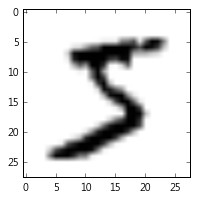

t_train[0]的數字:5


In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 載入 dataset/mnist.py 的 load_mnist 函數
from dataset.mnist import load_mnist

# 用 load_mnist 函數讀取 MNIST 資料集 
# (flatten:是否影像變1維, normalize:是否正規化為 0 ~ 1, one_hot_label:是否儲存為 one-hot 編碼)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False, one_hot_label = False)

# 輸出資料的形狀
print("輸出資料的形狀: x_train, t_train, x_test, t_test:")
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

# 顯示 x_train[0] 的影像大小
img = x_train[0]
print("x_train[0]的影像大小:" + str(img.shape))

# 定義顯示影像的函數
def plot_image(image):
    fig = plt.gcf()
    #設置顯示圖形的大小 （這列與上面那列可不打，只是顯示的圖形會為預設，但比例不會縮小）
    fig.set_size_inches(3, 3)
    #使用 plt.imshow 顯示圖形，傳入 28 * 28 的圖形，binary 以黑白灰顯示
    plt.imshow(image, cmap = 'binary')
    plt.show()

# 將 x_train[0] 形狀轉化成 28 * 28 的圖形
img = img.reshape(28, 28)
print("x_train[0]形狀轉化後的影像大小:" + str(img.shape))

# 顯示 x_train[0] 的影像
print("x_train[0]的影像:")
plot_image(img)

# 顯示 t_train[0] 的數字
label = t_train[0]
print("t_train[0]的數字:" + str(label))

#### 神經網路的推論

In [5]:
import numpy as np
# 載入 dataset/mnist.py 的 load_mnist 函數
from dataset.mnist import load_mnist
# pickle 模組實現了基本的數據序列化和反序列化
import pickle

#定義隱藏層的活化函數
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#定義輸出層的活化函數
def softmax(a):
    # c 的目的為防範溢位
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#定義取得資料的函數
def get_data():
    # 將輸入影像資料正規化(normalization)來進行預處理(pre-processing)
    # 其他預處理方法: 白色化(whitening)->讓整個資料分布形狀均勻一致的方法
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = True, one_hot_label = False)
    
    return x_test, t_test

#定義取得三層神經網路中的權重與偏權值的函數
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 反序列化方法 pickle.load 從資料檔案中讀取資料，並轉換為 python 的資料結構
        # 將序列化的對象從文件 file 中讀取出來，它的功能等同於 Unpickler(file).load
        # 必須以二進位的形式('rb')進行操作（讀取）
        network = pickle.load(f)
    
    return network

#定義三層神經網路向前傳播的過程
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

#計算神經網路 & 辨識準確度 (1)
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = forward(network, x[i])
    # 取得機率最高的元素 index
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)) )

#計算神經網路 & 辨識準確度 (2) - 使用批次(batch)處理
x, t = get_data()
network = init_network()

#批次的數量
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = forward(network, x_batch)
    # 取得機率最高的元素 index
    p = np.argmax(y_batch , axis = 1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])
    
print("Accuracy(使用批次(batch)處理):" + str(float(accuracy_cnt) / len(x)) )

Accuracy:0.9352
Accuracy(使用批次(batch)處理):0.9352


## 損失函數
* 均方誤差(mean square error)
$$E=\frac{1}{2}\sum_{k}\left ( y_{k}-t_{k} \right )^{2}$$

* 交叉熵誤差(cross entropy error)
$$E=-\sum_{k}t_{k}log \left ( y_{k} \right )$$

* 小批次處理的交叉熵誤差(cross entropy error)
$$E=-\frac{1}{N}\sum_{n}\sum_{k}t_{nk}log \left ( y_{nk} \right )$$

$y_{k}$:神經網路的輸出, $t_{k}$:正確答案標籤(使用 one-hot coding，正確標籤為 1, 其餘為 0)

In [21]:
import numpy as np
#均方誤差(mean square error)
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

#交叉熵誤差(cross entropy error)
def cross_entropy_error(y, t):
    #避免無限大
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

#小批次處理的交叉熵誤差(cross entropy error) - 使用 one-hot-label
def batch_cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(t*np.log(y)) / batch_size

## 數值微分

In [1]:
import numpy as np
#定義數值微分
def numerical_diff(f, x):
    #避免捨入誤差(rounding error)
    h = 1e-4
    #用中央差分減少誤差
    return (f(x+h)-f(x-h))/(2*h)

#定義數值梯度
def numerical_gradient(f, x):
    h = 1e-4
    #產生和 x 相同形狀的陣列，該元素全部為 0
    grad = np.zeros_like(x)
    #分別計算單一變數的偏微分
    for idx in range(x.size):
        tmp_val = x[idx]
        #計算 f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)        
        
        #計算 f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        #計算中央差分
        grad[idx] = (fxh1 - fxh2)/(2*h)
    
        #恢復原值
        x[idx] = tmp_val
        
    return grad

## 神經網路學習階段的更新參數方法 -> 進行參數最佳化
* 隨機梯度下降法(stochastic gradient descent, SGD)
* Momentum
* AdaGrad
* Adam

#### 隨機梯度下降法(stochastic gradient descent, SGD)

$$\vec{x}'=\vec{x}-\eta \frac{\partial f}{\partial \vec{x}}$$


神經網路的隨機梯度下降法(SGD)

$$\vec{W}'=\vec{W}-\eta \frac{\partial L}{\partial \vec{W}}$$


In [ ]:
import numpy as np

#建立梯度下降法類別
class SGD:

    def __init__(self, lr = 0.1):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [8]:
import numpy as np
#定義梯度下降法
# f: 要最佳化的函數, init_x: 預設值, lr: learning rate, step_num: 梯度法重複的步驟
# 學習率(learning rate)為超參數(hyperparameter) -> 人工調整
def gradient_descent(f, init_x, lr = 0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

#範例函數
def Function(x):
    return x[0]**2 + x[1]**2

#隨機的起始值
init_x = np.array([-9.0, 5.0])

#執行梯度下降法
gradient_descent(Function, init_x = init_x, lr = 0.1, step_num = 100)

array([ -1.83333238e-09,   1.01851799e-09])

SGD 軌跡圖

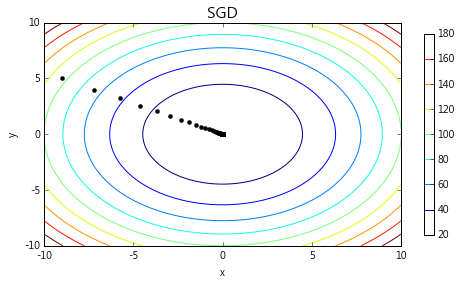

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False

#紀錄軌跡
def gradient_descent_trace(f, init_x, lr = 0.1, step_num = 100):
    x = init_x
    x_data[0] = x[0]
    y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        x -= lr*grad
        x_data[i] = x[0]
        y_data[i] = x[1]
    return x_data, y_data

def Function(x):
    return x[0]**2 + x[1]**2

init_position = np.array([-9.0, 5.0])
x_data = np.zeros(101)
y_data = np.zeros(101)
gradient_descent_trace(Function, init_x = init_position, lr = 0.1,
                       step_num = 100)

#畫圖
x = np.arange(-10.0, 10.0, 0.01)
y = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(x, y)
z = X**2 + Y**2

fig, axe = plt.subplots(1, 1, figsize=(8, 4))
cs = axe.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
axe.scatter(x_data, y_data, color = 'black', lw = 0.1)
axe.set_title("SGD", fontsize = 15)
axe.set_xlabel('x')
axe.set_ylabel('y')
axe.set_xlim(-10, 10)
axe.set_ylim(-10, 10)
plt.show()

SGD 軌跡動態圖

In [13]:
#畫圖就可以顯示在 GUI 裡(開啟新視窗)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.animation as animation

#使用生成器構建每一幀的傳入數據
update_num = 101
def data_gen(t=0):
    cnt = 0
    while cnt < update_num:
        cnt += 1
        t += 1
        yield x_data[t-1], y_data[t-1]

#全域變量
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
point, = ax.plot([], [], lw=2, color = 'black')      #刷新的關键部分
xdata, ydata = [], []

ax.scatter(x_data[0], y_data[0], color = 'black', lw = 3)
xo = np.arange(-10.0, 10.0, 0.01)
yo = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(xo, yo)
z = X**2 + Y**2
cs = ax.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
ax.set_title("SGD", fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')

#第一幀的内容
def init():
    ax.set_ylim(-10, 10)
    ax.set_xlim(-10, 10)
    del xdata[:]
    del ydata[:]
    point.set_data(xdata, ydata)    
    return point,

#刷新圖片的函数
def update(data):
    x, y = data
    xdata.append(x)
    ydata.append(y)    
    point.set_data(xdata, ydata)
    return point,

ani = animation.FuncAnimation(fig, update, data_gen, blit = False, interval = 50,
                              repeat = True, init_func = init)

#### Momentum
$$\vec{v}'=\alpha\vec{v}-\eta \frac{\partial f}{\partial \vec{x}}$$

$$\vec{x}'=\vec{x}+\vec{v}' $$

神經網路的 Momentum 方法

$$\vec{v}'=\alpha\vec{v}-\eta \frac{\partial L}{\partial \vec{W}}$$

$$\vec{W}'=\vec{W}+\vec{v}' $$

In [14]:
import numpy as np
#定義 momentum 方法
def momentum(f, init_x, init_v, lr = 0.1, alpha = 0.8, step_num = 100):
    x = init_x
    v = init_v
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        v = alpha * v - lr * grad
        x += v
    return x

#範例函數
def Function(x):
    return x[0]**2 + x[1]**2

#隨機的起始值
init_x = np.array([-9.0, 5.0])
init_v = np.array([1.0, -3.0])

#執行梯度下降法
momentum(Function, init_x = init_x, init_v = init_v,
                 lr = 0.1, alpha = 0.8, step_num = 100)

array([ 0.00011283, -0.00011071])

Momentum 軌跡圖

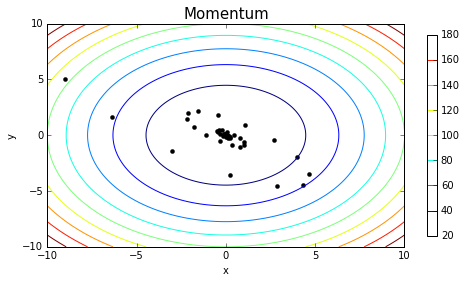

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False

#紀錄軌跡
def momentum_trace(f, init_x, init_v, lr = 0.1, alpha = 0.8, step_num = 100):
    x = init_x
    v = init_v
    x_data[0] = x[0]
    y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        v = alpha * v - lr * grad
        x += v
        x_data[i] = x[0]
        y_data[i] = x[1]
    return x_data, y_data

def Function(x):
    return x[0]**2 + x[1]**2

init_position = np.array([-9.0, 5.0])
init_velocity = np.array([1.0, -3.0])
x_data = np.zeros(101)
y_data = np.zeros(101)
momentum_trace(Function, init_x = init_position, init_v = init_velocity,
                 lr = 0.1, alpha = 0.8, step_num = 100)
#畫圖
x = np.arange(-10.0, 10.0, 0.01)
y = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(x, y)
z = X**2 + Y**2

fig, axe = plt.subplots(1, 1, figsize=(8, 4))
cs = axe.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
axe.scatter(x_data, y_data, color = 'black', lw = 0.1)
axe.set_title("Momentum", fontsize = 15)
axe.set_xlabel('x')
axe.set_ylabel('y')
axe.set_xlim(-10, 10)
axe.set_ylim(-10, 10)
plt.show()

Momentum 軌跡動態圖

In [15]:
#畫圖就可以顯示在 GUI 裡(開啟新視窗)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.animation as animation

#使用生成器構建每一幀的傳入數據
update_num = 101
def data_gen(t=0):
    cnt = 0
    while cnt < update_num:
        cnt += 1
        t += 1
        yield x_data[t-1], y_data[t-1]

#全域變量
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
point, = ax.plot([], [], lw=2, color = 'black')      #刷新的關键部分
xdata, ydata = [], []

ax.scatter(x_data[0], y_data[0], color = 'black', lw = 3)
xo = np.arange(-10.0, 10.0, 0.01)
yo = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(xo, yo)
z = X**2 + Y**2
cs = ax.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
ax.set_title("Momentum", fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')

#第一幀的内容
def init():
    ax.set_ylim(-10, 10)
    ax.set_xlim(-10, 10)
    del xdata[:]
    del ydata[:]
    point.set_data(xdata, ydata)    
    return point,

#刷新圖片的函数
def update(data):
    x, y = data
    xdata.append(x)
    ydata.append(y)    
    point.set_data(xdata, ydata)
    return point,

ani = animation.FuncAnimation(fig, update, data_gen, blit = False, interval = 50,
                              repeat = True, init_func = init)

#### AdaGrad
$$\vec{h}'=\vec{h}+\frac{\partial f}{\partial \vec{x}}\odot\frac{\partial f}{\partial \vec{x}}$$


$$\vec{x}'=\vec{x}-\eta \frac{1}{\sqrt{\vec{h}'}} \frac{\partial f}{\partial \vec{x}} $$


In [16]:
import numpy as np
#定義 AdaGrad 方法
def AdaGrad(f, init_x, init_h, lr = 0.1, step_num = 100):
    x = init_x
    h = init_h
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        h =  h + grad * grad
        x -= lr * (1/np.sqrt(h)) * grad
    return x

#範例函數
def Function(x):
    return x[0]**2 + x[1]**2

#隨機的起始值
init_x = np.array([-9.0, 5.0])
init_h = np.array([1.0, -3.0])

#執行梯度
AdaGrad(Function, init_x = init_x, init_h = init_h, lr = 0.1, step_num = 100)

array([-7.21663616,  3.27969412])

AdaGrad 軌跡圖

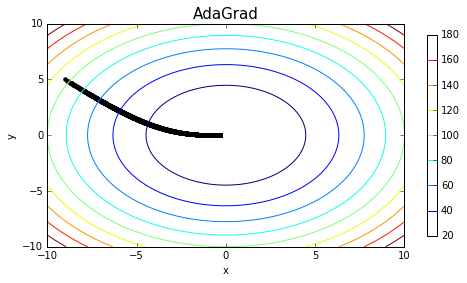

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False

#紀錄軌跡
def AdaGrad_trace(f, init_x, init_h, lr = 0.1, step_num = 6000):
    x = init_x
    h = init_h
    x_data[0] = x[0]
    y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        h =  h + grad * grad
        x -= lr * (1/np.sqrt(h)) * grad
        x_data[i] = x[0]
        y_data[i] = x[1]
    return x_data, y_data

def Function(x):
    return x[0]**2 + x[1]**2

init_position = np.array([-9.0, 5.0])
init_h = np.array([1.0, -3.0])
x_data = np.zeros(6001)
y_data = np.zeros(6001)
AdaGrad_trace(Function, init_x = init_position, init_h = init_h,
                 lr = 0.1, step_num = 6000)
#畫圖
x = np.arange(-10.0, 10.0, 0.01)
y = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(x, y)
z = X**2 + Y**2

fig, axe = plt.subplots(1, 1, figsize=(8, 4))
cs = axe.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
axe.scatter(x_data, y_data, color = 'black', lw = 0.1)
axe.set_title("AdaGrad", fontsize = 15)
axe.set_xlabel('x')
axe.set_ylabel('y')
axe.set_xlim(-10, 10)
axe.set_ylim(-10, 10)
plt.show()

AdaGrad 軌跡動態圖

In [18]:
#畫圖就可以顯示在 GUI 裡(開啟新視窗)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.animation as animation

#使用生成器構建每一幀的傳入數據
update_num = 6001
def data_gen(t=0):
    cnt = 0
    while cnt < update_num:
        cnt += 1
        t += 1
        yield x_data[t-1], y_data[t-1]

#全域變量
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
point, = ax.plot([], [], lw=2, color = 'black')      #刷新的關键部分
xdata, ydata = [], []

ax.scatter(x_data[0], y_data[0], color = 'black', lw = 3)
xo = np.arange(-10.0, 10.0, 0.01)
yo = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(xo, yo)
z = X**2 + Y**2
cs = ax.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
ax.set_title("AdaGrad", fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')

#第一幀的内容
def init():
    ax.set_ylim(-10, 10)
    ax.set_xlim(-10, 10)
    del xdata[:]
    del ydata[:]
    point.set_data(xdata, ydata)    
    return point,

#刷新圖片的函数
def update(data):
    x, y = data
    xdata.append(x)
    ydata.append(y)    
    point.set_data(xdata, ydata)
    return point,

ani = animation.FuncAnimation(fig, update, data_gen, blit = False, interval = 0.1,
                              repeat = True, init_func = init)

#### Adam
$$\vec{m}^{\left ( t+1 \right )}=\beta_{1}\vec{m}^{\left ( t \right )}+\left ( 1-\beta _{1} \right )\frac{\partial f}{\partial \vec{x}^{\left ( t \right )}}$$

$$\vec{v}^{\left ( t+1 \right )}=\beta_{2}\vec{v}^{\left ( t \right )}+\left ( 1-\beta _{2} \right )\frac{\partial f}{\partial \vec{x}^{\left ( t \right )}}\odot\frac{\partial f}{\partial \vec{x}^{\left ( t \right )}}$$

$$\hat{m}=\frac{\vec{m}^{\left ( t+1 \right )}}{1-\beta _{1}}$$

$$\hat{v}=\frac{\vec{v}^{\left ( t+1 \right )}}{1-\beta _{2}}$$

$$\vec{x}^{\left ( t+1 \right )}=\vec{x}^{\left ( t \right )}-\eta \frac{\hat{m}}{\sqrt{\hat{v}}+\epsilon }$$


In [3]:
import numpy as np
#定義 Adam 方法 (超參數(hyperparameter): beta_1, beta_2, lr)
def Adam(f, init_x, init_m, init_v, beta_1 = 0.9, beta_2 = 0.999, lr = 0.1,
         epsilon = 1e-8, step_num = 100):
    x = init_x
    m = init_m
    v = init_v
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * grad ** 2
        hat_m = m / (1 - beta_1)
        hat_v = v / (1 - beta_2)
        x -= lr * (hat_m / (np.sqrt(hat_v) + epsilon))
    return x

#範例函數
def Function(x):
    return x[0]**2 + x[1]**2

#隨機的起始值
init_x = np.array([-9.0, 5.0])
init_m = np.array([1.0, -3.0])
init_v = np.array([1.0, 1.0])

#執行梯度
Adam(Function, init_x = init_x, init_m = init_m, init_v = init_v, beta_1 = 0.9,
     beta_2 = 0.999, lr = 0.1, epsilon = 1e-8, step_num = 100)

array([-0.50697991, -0.03735005])

Adam 軌跡圖

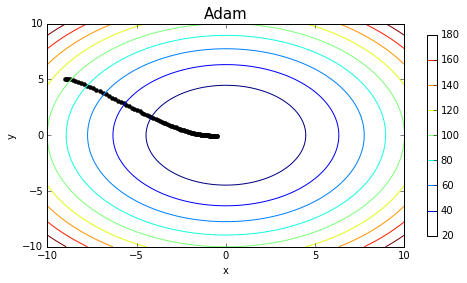

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False

#紀錄軌跡
def Adam_trace(f, init_x, init_m, init_v, beta_1 = 0.9, beta_2 = 0.999,
               lr = 0.1, epsilon = 1e-8, step_num = 100):
    x = init_x
    m = init_m
    v = init_v
    x_data[0] = x[0]
    y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * grad ** 2
        hat_m = m / (1 - beta_1)
        hat_v = v / (1 - beta_2)
        x -= lr * (hat_m / (np.sqrt(hat_v) + epsilon))
        x_data[i] = x[0]
        y_data[i] = x[1]
    return x_data, y_data

def Function(x):
    return x[0]**2 + x[1]**2

init_position = np.array([-9.0, 5.0])
init_m = np.array([1.0, -3.0])
init_v = np.array([1.0, 1.0])
x_data = np.zeros(101)
y_data = np.zeros(101)
Adam_trace(Function, init_x = init_position, init_m = init_m, init_v = init_v,
           beta_1 = 0.9, beta_2 = 0.999, lr = 0.1, epsilon = 1e-8,
           step_num = 100)
#畫圖
x = np.arange(-10.0, 10.0, 0.01)
y = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(x, y)
z = X**2 + Y**2

fig, axe = plt.subplots(1, 1, figsize=(8, 4))
cs = axe.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
axe.scatter(x_data, y_data, color = 'black', lw = 0.1)
axe.set_title("Adam", fontsize = 15)
axe.set_xlabel('x')
axe.set_ylabel('y')
axe.set_xlim(-10, 10)
axe.set_ylim(-10, 10)
plt.show()

Adam 軌跡動態圖

In [6]:
#畫圖就可以顯示在 GUI 裡(開啟新視窗)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.animation as animation

#使用生成器構建每一幀的傳入數據
update_num = 101
def data_gen(t=0):
    cnt = 0
    while cnt < update_num:
        cnt += 1
        t += 1
        yield x_data[t-1], y_data[t-1]

#全域變量
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
point, = ax.plot([], [], lw=2, color = 'black')      #刷新的關键部分
xdata, ydata = [], []

ax.scatter(x_data[0], y_data[0], color = 'black', lw = 3)
xo = np.arange(-10.0, 10.0, 0.01)
yo = np.arange(-10.0, 10.0, 0.01)
X, Y = np.meshgrid(xo, yo)
z = X**2 + Y**2
cs = ax.contour(X, Y, z, 10)
fig.colorbar(cs, shrink = 0.9)
ax.set_title("Adam", fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')

#第一幀的内容
def init():
    ax.set_ylim(-10, 10)
    ax.set_xlim(-10, 10)
    del xdata[:]
    del ydata[:]
    point.set_data(xdata, ydata)    
    return point,

#刷新圖片的函数
def update(data):
    x, y = data
    xdata.append(x)
    ydata.append(y)    
    point.set_data(xdata, ydata)
    return point,

ani = animation.FuncAnimation(fig, update, data_gen, blit = False, interval = 0.1,
                              repeat = True, init_func = init)

#### 四種方法的軌跡動態圖比較

In [5]:
#畫圖就可以顯示在 GUI 裡(開啟新視窗)
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
# 解決更改字型後，儲存影像是負號 '-'，但顯示為方塊的問題
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.animation as animation

#定義函數
def Function_2(x):
    return 3 * (1 - x[0])**2 * np.exp(- x[0]**2 - (x[1] + 1)**2) - 10 * (x[0]/5- x[0]**3 - x[1]**5) * np.exp(- x[0]**2 - x[1]**2) - 1/3 * np.exp(- (x[0] + 1)**2 - x[1]**2)

#定義各種方法
def gradient_descent_trace(f, init_x, lr = 0.1, step_num = 100):
    x = init_x
    SGD_x_data[0] = x[0]
    SGD_y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        x -= lr*grad
        SGD_x_data[i] = x[0]
        SGD_y_data[i] = x[1]
    return SGD_x_data, SGD_y_data

SGD_init_position = np.array([0.0, 1.0])
SGD_x_data = np.zeros(101)
SGD_y_data = np.zeros(101)
gradient_descent_trace(Function_2, init_x = SGD_init_position, lr = 0.1,
                       step_num = 100)

def momentum_trace(f, init_x, init_v, lr = 0.1, alpha = 0.1, step_num = 100):
    x = init_x
    v = init_v
    momentum_x_data[0] = x[0]
    momentum_y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        v = alpha * v - lr * grad
        x += v
        momentum_x_data[i] = x[0]
        momentum_y_data[i] = x[1]
    return momentum_x_data, momentum_y_data

momentum_init_position = np.array([0.0, 1.0])
momentum_init_velocity = np.array([0.5, -1.0])
momentum_x_data = np.zeros(101)
momentum_y_data = np.zeros(101)
momentum_trace(Function_2, init_x = momentum_init_position, 
               init_v = momentum_init_velocity, lr = 0.1, alpha = 0.1,
               step_num = 100)

def AdaGrad_trace(f, init_x, init_h, lr = 0.1, step_num = 100):
    x = init_x
    h = init_h
    AdaGrad_x_data[0] = x[0]
    AdaGrad_y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        h =  h + grad * grad
        x -= lr * (1/np.sqrt(h)) * grad
        AdaGrad_x_data[i] = x[0]
        AdaGrad_y_data[i] = x[1]
    return AdaGrad_x_data, AdaGrad_y_data

AdaGrad_init_position = np.array([0.0, 1.0])
AdaGrad_init_h = np.array([1.0, -3.0])
AdaGrad_x_data = np.zeros(101)
AdaGrad_y_data = np.zeros(101)
AdaGrad_trace(Function_2, init_x = AdaGrad_init_position, init_h = AdaGrad_init_h,
                 lr = 0.1, step_num = 100)

def Adam_trace(f, init_x, init_m, init_v, beta_1 = 0.9, beta_2 = 0.999,
               lr = 0.1, epsilon = 1e-8, step_num = 100):
    x = init_x
    m = init_m
    v = init_v
    Adam_x_data[0] = x[0]
    Adam_y_data[0] = x[1]
    for i in range(1, step_num + 1):
        grad = numerical_gradient(f, x)
        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * grad ** 2
        hat_m = m / (1 - beta_1)
        hat_v = v / (1 - beta_2)
        x -= lr * (hat_m / (np.sqrt(hat_v) + epsilon))
        Adam_x_data[i] = x[0]
        Adam_y_data[i] = x[1]
    return Adam_x_data, Adam_y_data

Adam_init_position = np.array([0.0, 1.0])
Adam_init_m = np.array([1.0, -3.0])
Adam_init_v = np.array([1.0, 1.0])
Adam_x_data = np.zeros(101)
Adam_y_data = np.zeros(101)
Adam_trace(Function_2, init_x = Adam_init_position, init_m = Adam_init_m,
           init_v = Adam_init_v, beta_1 = 0.9, beta_2 = 0.999, lr = 0.1,
           epsilon = 1e-8, step_num = 100)

#使用生成器構建每一幀的傳入數據
update_num = 101
def data_gen(t=0):
    cnt = 0
    while cnt < update_num:
        cnt += 1
        t += 1
        yield SGD_x_data[t-1], SGD_y_data[t-1], momentum_x_data[t-1], momentum_y_data[t-1], AdaGrad_x_data[t-1], AdaGrad_y_data[t-1], Adam_x_data[t-1], Adam_y_data[t-1]

#製造圖形
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)              #調整子圖間距

# [註]:位置參數(positional argument)不能在關鍵詞參數(keyword argument)之後出現
# [註]:位置參數(positional argument)有優先權
point_0, = ax[0][0].plot([], [], lw = 2, color = 'black')      #刷新的關键部分
point_1, = ax[0][1].plot([], [], lw = 2, color = 'black')      #刷新的關键部分
point_2, = ax[1][0].plot([], [], lw = 2, color = 'black')  #刷新的關键部分
point_3, = ax[1][1].plot([], [], lw = 2, color = 'black')  #刷新的關键部分

SGD_xdata, SGD_ydata = [], []
momentum_xdata, momentum_ydata = [], []
AdaGrad_xdata, AdaGrad_ydata = [], []
Adam_xdata, Adam_ydata = [], []

ax[0][0].scatter(SGD_x_data[0], SGD_y_data[0], color = 'black', lw = 3)
ax[0][1].scatter(momentum_x_data[0], momentum_y_data[0], color = 'black', lw = 3)
ax[1][0].scatter(AdaGrad_x_data[0], AdaGrad_y_data[0], color = 'black', lw = 3)
ax[1][1].scatter(Adam_x_data[0], Adam_y_data[0], color = 'black', lw = 3)

xo = np.arange(-1.0, 1.0, 0.01)
yo = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(xo, yo)
z = 3 * (1 - X)**2 * np.exp(- X**2 - (Y + 1)**2) - 10 * (X/5- X**3 - Y**5) * np.exp(- X**2 - Y**2) - 1/3 * np.exp(- (X + 1)**2 - Y**2)

cs_0 = ax[0][0].contourf(X, Y, z, 10)
cs_1 = ax[0][1].contourf(X, Y, z, 10)
cs_2 = ax[1][0].contourf(X, Y, z, 10)
cs_3 = ax[1][1].contourf(X, Y, z, 10)

fig.colorbar(cs_0, shrink = 0.9, extend='both', spacing='proportional', ax = ax[0][0])
fig.colorbar(cs_1, shrink = 0.9, extend='both', spacing='proportional', ax = ax[0][1])
fig.colorbar(cs_2, shrink = 0.9, extend='both', spacing='proportional', ax = ax[1][0])
fig.colorbar(cs_3, shrink = 0.9, extend='both', spacing='proportional', ax = ax[1][1])

ax[0][0].set_title("SGD", fontsize = 15)
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('y')
ax[0][1].set_title("Momentum", fontsize = 15)
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('y')
ax[1][0].set_title("AdaGrad", fontsize = 15)
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
ax[1][1].set_title("Adam", fontsize = 15)
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('y')

#第一幀的内容
def init():
    ax[0][0].set_ylim(-1, 1)
    ax[0][0].set_xlim(-1, 1)
    ax[0][1].set_ylim(-1, 1)
    ax[0][1].set_xlim(-1, 1)
    ax[1][0].set_ylim(-1, 1)
    ax[1][0].set_xlim(-1, 1)
    ax[1][1].set_ylim(-1, 1)
    ax[1][1].set_xlim(-1, 1)
    
    del SGD_xdata[:], momentum_xdata[:], AdaGrad_xdata[:], Adam_xdata[:]
    del SGD_ydata[:], momentum_ydata[:], AdaGrad_ydata[:], Adam_ydata[:]
    
    point_0.set_data(SGD_xdata, SGD_ydata) 
    point_1.set_data(momentum_xdata, momentum_ydata)    
    point_2.set_data(AdaGrad_xdata, AdaGrad_ydata)    
    point_3.set_data(Adam_xdata, Adam_ydata)    
    
    return point_0, point_1, point_2, point_3

#刷新圖片的函数
def update(data):
    SGD_x, SGD_y, momentum_x, momentum_y, AdaGrad_x, AdaGrad_y, Adam_x, Adam_y = data
    
    SGD_xdata.append(SGD_x)
    SGD_ydata.append(SGD_y) 
    momentum_xdata.append(momentum_x)
    momentum_ydata.append(momentum_y) 
    AdaGrad_xdata.append(AdaGrad_x)
    AdaGrad_ydata.append(AdaGrad_y) 
    Adam_xdata.append(Adam_x)
    Adam_ydata.append(Adam_y) 
    
    point_0.set_data(SGD_xdata, SGD_ydata)
    point_1.set_data(momentum_xdata, momentum_ydata)
    point_2.set_data(AdaGrad_xdata, AdaGrad_ydata)
    point_3.set_data(Adam_xdata, Adam_ydata)
    
    return point_0, point_1, point_2, point_3

ani = animation.FuncAnimation(fig, update, data_gen, blit = False, interval = 100,
                              repeat = True, init_func = init)

ani.save('ani.mp4', fps = 5, writer = 'ffmpeg')

## 神經網路的學習與測試

* 建立神經網路的類別
* 執行小批次學習
* 用測試資料評估學習的結果

#### 建立神經網路的類別

In [13]:
import numpy as np

#定義隱藏層的活化函數
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#定義輸出層的活化函數
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#小批次處理的交叉熵誤差(cross entropy error) - 使用 one-hot-label
def batch_cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

#定義數值梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    # np.nditer: numpy array自帶的迭代器
    # flags=['multi_index']: 表示對 a 進行多重索引
    # op_flags=['readwrite']: 表示不僅對 a 進行 read（讀取），還可以 write（寫入)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # it.multi_index: 表示元素的索引，可以看到結果都是 index
        idx = it.multi_index
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = float(tmp_val) - h 
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
                
        x[idx] = tmp_val
        # it.iternext(): 表示進入下一次迭代
        it.iternext()   
   
    return grad

#-------------------------------------------------------------------------------
#定義雙層網路的類別
class two_layer_net:
    
    #定義初始化雙層神經網路中的權重與偏權值之函數
    def __init__(self, input_size, hidden_size, output_size,
             weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    #定義雙層神經網路向前傳播的過程
    def forward(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
    
        return y

    #定義損失函數
    def loss(self, x, t):
        y = self.forward(x)
        
        return batch_cross_entropy_error(y, t)
    
    #定義數值梯度
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
    
    #計算準確度
    def accuracy(self, x, t):
        y = self.forward(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy= np.sum(y == t) / float(x.shape[0])
        
        return accuracy

#### 執行小批次學習

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ProcessBar.Process_Bar import *

#取得資料
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = True, one_hot_label = True)

#設定神經網路
network = two_layer_net(input_size = 784, hidden_size = 50, output_size = 10)

#設定超參數
iters_num = 200
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

#建立訓練過程中的損失函數值列表
train_loss_list = []

#建立訓練與測試資料的辯識準確度列表
train_acc_list = []
test_acc_list = []

# 每一週期的重複次數
iter_per_epoch = max(train_size/batch_size, 1)

#建立進度條
process_bar = ShowProcess(iters_num, '計算完成')

#執行小批次學習
for i in range(iters_num):
    #取得小批次
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #計算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)
    
    #更新參數
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]
        
    #紀錄學習過程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #計算一個周期的辯識準確度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("(train acc, test acc) = " + "(" + str(train_acc) + "," + str(test_acc) + ")")
    
    #顯示當前進度
    process_bar.show_process()
    time.sleep(0.01)

(train acc, test acc) = (0.112366666667,0.1135)
[∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎∎]100.00%
計算完成


#### 損失函數變化圖

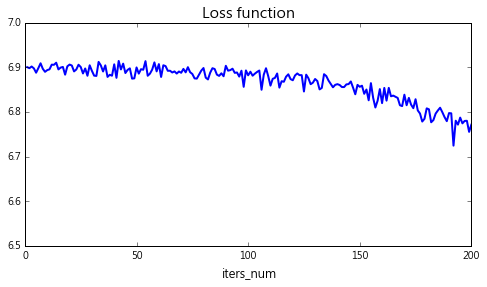

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(np.arange(1, iters_num + 1), train_loss_list, color='b', lw=2)
ax.set_ylim(6.5, 7)
ax.set_title("Loss function", fontsize = 15)
ax.set_xlabel("iters_num", fontsize = 12)

#### 用測試資料評估學習的結果: 辯識準確度變化圖

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(np.arange(int(iters_num/iter_per_epoch)), train_acc_list, color='r', linestyle="-", marker="o", lw=2, label="train_acc_list")
ax.plot(np.arange(int(iters_num/iter_per_epoch)), test_acc_list, color='k', linestyle="--", marker="^", lw=2, label="test_acc_list")
ax.set_ylim(0.7, 1)
ax.set_xlabel("epochs", fontsize = 12)
ax.set_ylabel("accuracy", fontsize = 12)
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 0.3))